# Non-Metrical filtrations 
(or any type of hand-made filtration)

In [1]:
import dionysus as dio 
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt
import networkx as nx 

## Simplices

In [2]:
s = dio.Simplex([0,1,2])
print("Dimension:", s.dimension())

Dimension: 2


In [3]:
for sb in s.boundary():
     print(sb)

for v in s:
    print(v)
    
s.data = 5
print(s)

<1,2> 0
<0,2> 0
<0,1> 0
0
1
2
<0,1,2> 5


In [4]:
simplex4 = dio.Simplex([0,1,2,3])
sphere4  = dio.closure([simplex4], 4)
print(sphere4)

[<2> 0, <0,1,3> 0, <0> 0, <1> 0, <1,3> 0, <0,1,2> 0, <3> 0, <2,3> 0, <0,1> 0, <1,2,3> 0, <0,2> 0, <0,1,2,3> 0, <0,2,3> 0, <0,3> 0, <1,2> 0]


## Filtration: super simple case

In [5]:
simplices = [([2], 4), ([1,2], 5), ([0,2], 6), 
             ([0], 1),   ([1], 2), ([0,1], 3)]
f = dio.Filtration()

In [6]:
for vertices, time in simplices:
     f.append(dio.Simplex(vertices, time))
f.sort()
for s in f:
    print(s)

<0> 1
<1> 2
<0,1> 3
<2> 4
<1,2> 5
<0,2> 6


<img src = "imgs/filtration.png">



In [7]:
m = dio.homology_persistence(f)

In [8]:
dgms = dio.init_diagrams(m, f)
print(dgms)

[Diagram with 3 points, Diagram with 1 points]


In [9]:
for i, dgm in enumerate(dgms):
    for pt in dgm:
        print(i, pt.birth, pt.death)

0 1.0 inf
0 2.0 3.0
0 4.0 5.0
1 6.0 inf


## (Aside) Metrical Filtration: it's possible here too..

In [10]:
points = np.random.random((100, 2))
f = dio.fill_rips(points, 2, 1.)
p = dio.homology_persistence(f)
dgms = dio.init_diagrams(p, f)

/home/petri/.local/lib/python3.7/site-packages/dionysus/plot.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


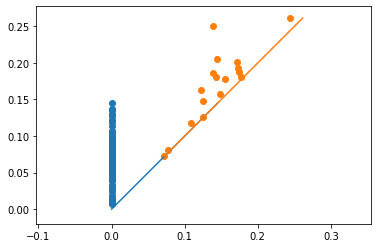

In [11]:
dio.plot.plot_diagram(dgms[0]);
dio.plot.plot_diagram(dgms[1]);

## Filtration: non-metrical case

In [12]:
g = nx.read_weighted_edgelist('../data/wnets/celegans_weighted_undirected.edges',nodetype=int)

In [13]:
def weight_based_filtration(g, min_weight=None):
    import networkx as nx 
    import dionysus as dio
    w = nx.get_edge_attributes(g,'weight');
    ww = [(k, w[k]) for k in sorted(w, key=w.get, reverse=True)]
    if min_weight==None:
        min_weight = ww[-1][1];
    gg = nx.Graph();
    gg.add_nodes_from(g.nodes());
    CD = dio.Filtration()
    index = 0
    for n in g.nodes():
        CD.append(dio.Simplex([n],index))

    for k, v in ww:
        gg.add_edge(k[0],k[1]);
        cliques = nx.find_cliques(gg);
        for clique in cliques:
            if len(clique)>3:
                new_simplices = dio.closure([dio.Simplex(clique)], len(clique));
                for simp in new_simplices:
                    if dio.Simplex(simp) not in CD:
                        CD.append(dio.Simplex(simp,index));
            elif len(clique)==2:
                CD.append(dio.Simplex(clique,index))
        index+=1; 
        if v==min_weight:
            break;
    return CD, index;

In [14]:
f = weight_based_filtration(g,2)[0]

In [15]:
m = dio.homology_persistence(f)
dgms = dio.init_diagrams(m, f)

/home/petri/.local/lib/python3.7/site-packages/dionysus/plot.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


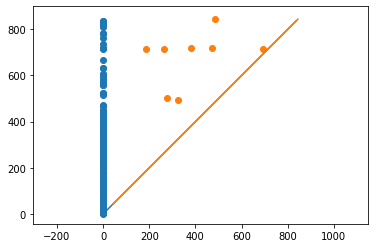

In [16]:
dio.plot.plot_diagram(dgms[0]);
dio.plot.plot_diagram(dgms[1]);

# Exercises

Note that the filtration is now labeled by the rank index of the weights not the actual weights.   
Filtrations are always on the integers, but can be remapped back after the computation of persistent homology

## how to develop node-based value filtration?
For example, based on:  
- betweenness?
- closeness centrality?
- k-core filtration?
- another node meta-data?

## what about a neighbourhood-based filtration? 
- commute time?
- shortest path? 
